In [48]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
from matplotlib import style
style.use("default")
%matplotlib inline

In [49]:
statevec_simualor = q.Aer.get_backend("statevector_simulator")

In [50]:
qasm_sim = q.Aer.get_backend("qasm_simulator")

In [51]:
def do_job(circuit):
    job = q.execute(circuit, backend = statevec_simualor)
    result = job.result()
    
    statevec = result.get_statevector()
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend = qasm_sim, shots = 1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [52]:
# 2 qubits, 2 classical bits
circuit = q.QuantumCircuit(2, 2)

In [53]:
statevec, counts = do_job(circuit)

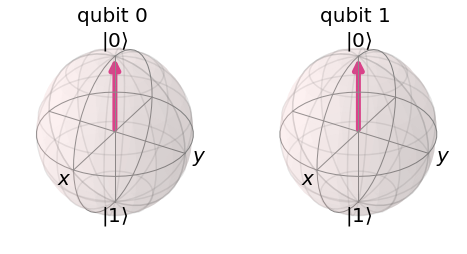

In [54]:
plot_bloch_multivector(statevec)

## Le port de Hadamard
- Hadamard gate: permet d'effectuer la superposition du qubit |0>

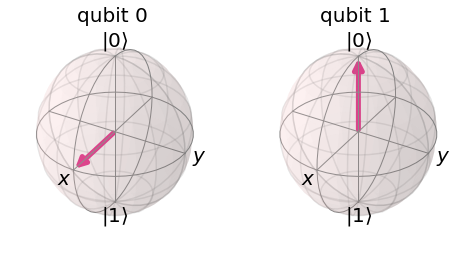

In [55]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

## Entanglement between qubit 0 and qubit 1 avec un cnot port

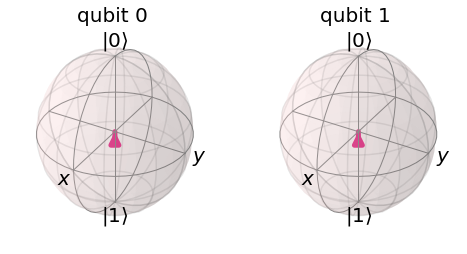

In [56]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0) # hadamard on qubit 0
circuit.cx(0,1) # controlled not control: 0 target 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

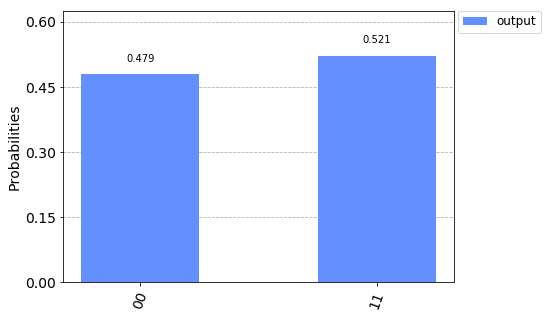

In [57]:
plot_histogram([counts], legend = ["output"])

In [58]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.cx(0,2)
circuit.cx(1,2)
circuit.draw()

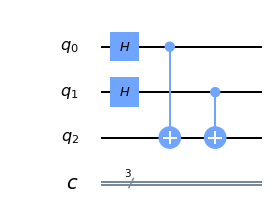

In [59]:
circuit.draw(output = "mpl")

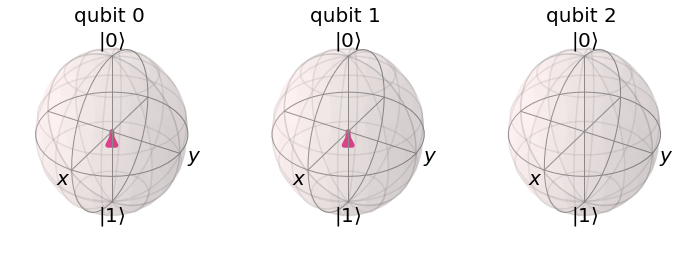

In [60]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

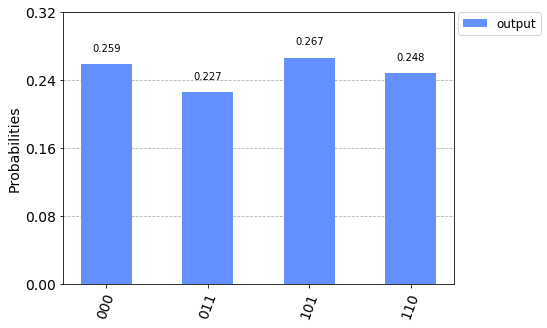

In [61]:
plot_histogram([counts], legend = ["output"])

In [69]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

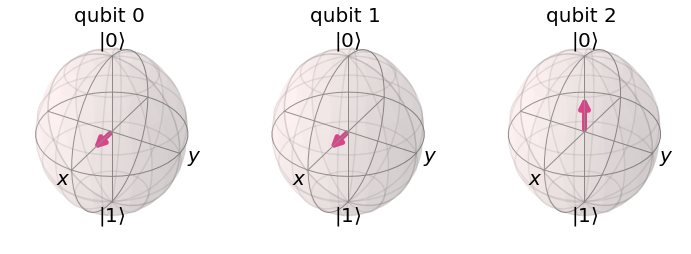

In [70]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

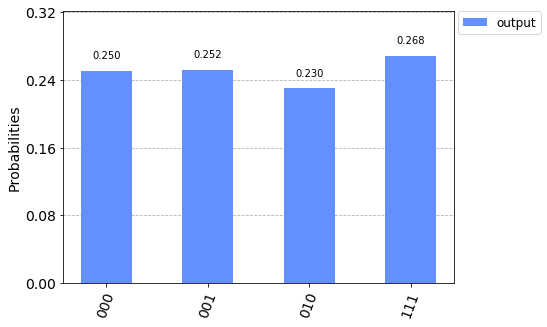

In [71]:
plot_histogram([counts], legend = ["output"])

In [72]:
circuit = q.QuantumCircuit(3,1)  # 3 qubits, only 1 classical bit

In [73]:
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

In [76]:
circuit.measure([2], [0])
result = q.execute(circuit, backend=qasm_sim, shots = 1024).result()

In [77]:
counts = result.get_counts()

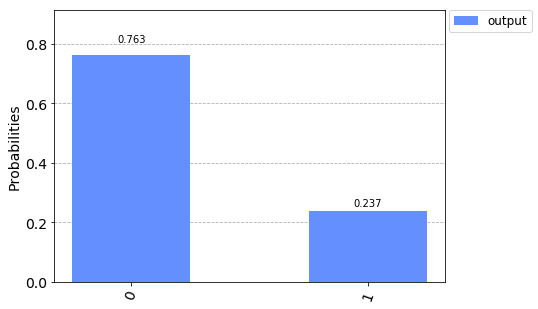

In [79]:
plot_histogram([counts], legend = ["output"])

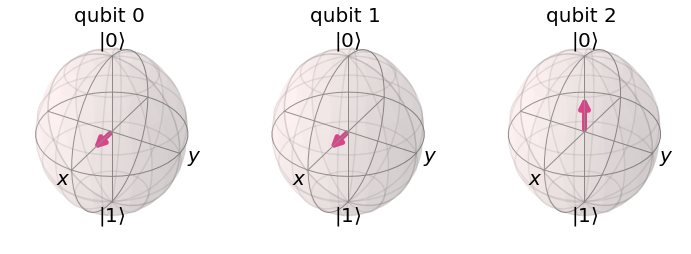

In [80]:
import math

circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not


statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

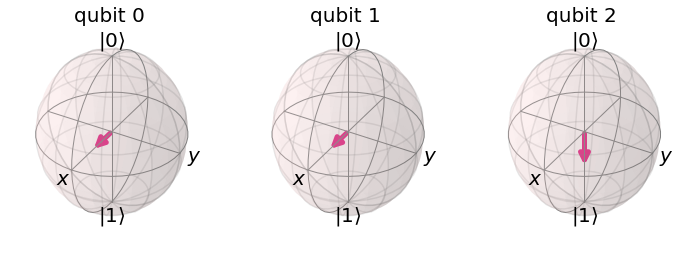

In [81]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

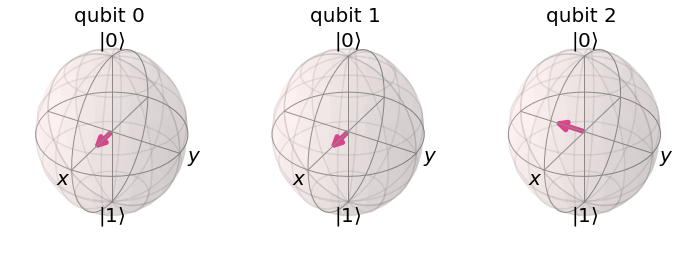

In [82]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

In [83]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)
circuit.draw()

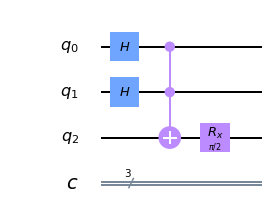

In [84]:
circuit.draw(output="mpl")

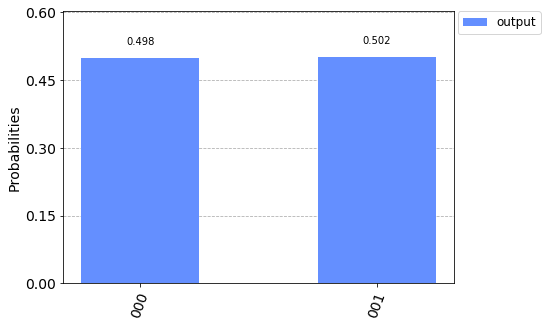

In [85]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

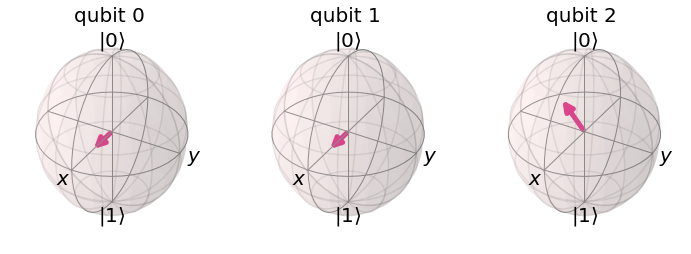

In [86]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

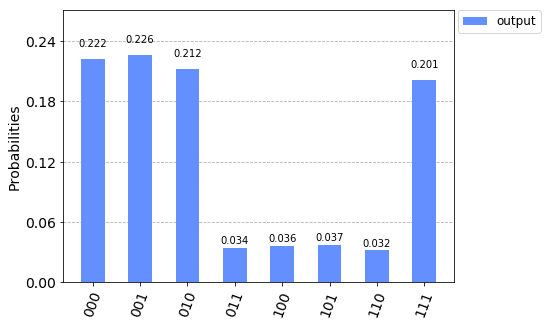

In [87]:
plot_histogram([counts], legend=['output'])

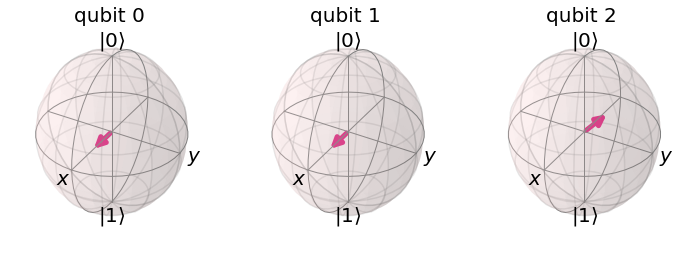

In [88]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

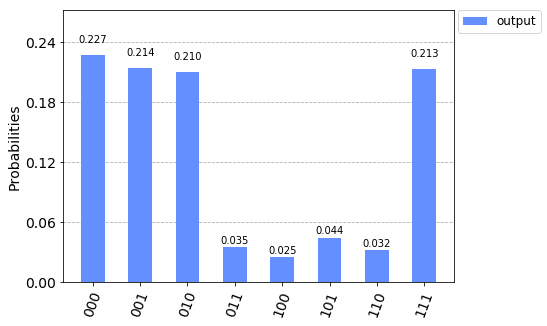

In [89]:
plot_histogram([counts], legend=['output'])

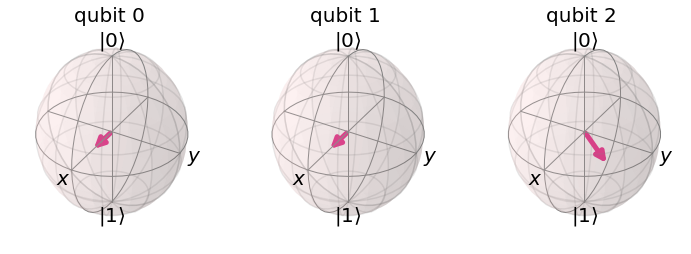

In [90]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

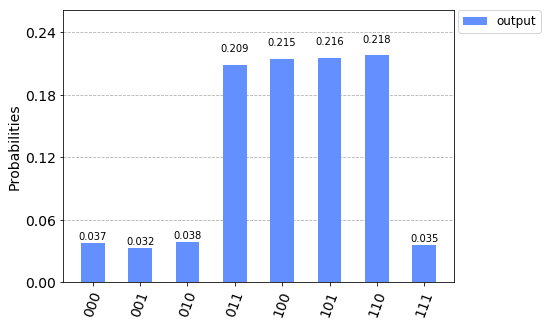

In [91]:
plot_histogram([counts], legend=['output'])

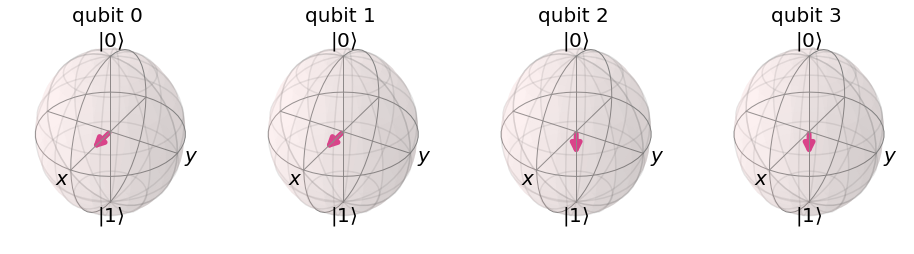

In [92]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

In [93]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)

# moving this down here to the very end:
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw()

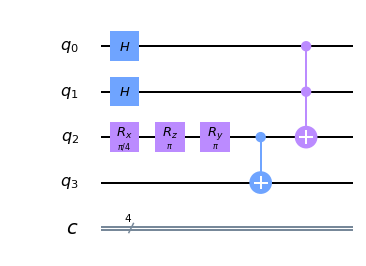

In [94]:
circuit.draw(output = "mpl")